In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key 

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | rognac
Processing Record 4 of Set 1 | senno
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | marshfield
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | marsa matruh
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | montepuez
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | raeren
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | rikitea
Process

Processing Record 35 of Set 4 | fairbanks
Processing Record 36 of Set 4 | luba
Processing Record 37 of Set 4 | atherton
Processing Record 38 of Set 4 | guaymas
Processing Record 39 of Set 4 | yeppoon
Processing Record 40 of Set 4 | havre-saint-pierre
Processing Record 41 of Set 4 | sale
Processing Record 42 of Set 4 | surt
Processing Record 43 of Set 4 | berlevag
Processing Record 44 of Set 4 | arawa
Processing Record 45 of Set 4 | itarema
Processing Record 46 of Set 4 | tamiahua
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | kendari
Processing Record 49 of Set 4 | cozumel
Processing Record 50 of Set 4 | chase
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | fort frances
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | marawi
Processing Record 6 of Set 5 | sao felix do xingu
Processing Record 7 of Set 5 | nago
Processing Record 8 of Set 5 | tevriz
Processing Record 9 of Set 5 

Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | brae
Processing Record 28 of Set 8 | atkinson
Processing Record 29 of Set 8 | uspenka
Processing Record 30 of Set 8 | ibra
Processing Record 31 of Set 8 | wattegama
Processing Record 32 of Set 8 | lamu
Processing Record 33 of Set 8 | bitkine
Processing Record 34 of Set 8 | ambilobe
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | lapeer
Processing Record 37 of Set 8 | doka
Processing Record 38 of Set 8 | kerema
Processing Record 39 of Set 8 | nunoa
Processing Record 40 of Set 8 | maromitsa
Processing Record 41 of Set 8 | grindavik
Processing Record 42 of Set 8 | villazon
Processing Record 43 of Set 8 | ahuimanu
Processing Record 44 of Set 8 | airai
Processing Record 45 of Set 8 | fallon
Processing Record 46 of Set 8 | puerto palomas
Processing Record 47 of Set 8 | vaitape
Processing Record 48 of Set 8 | zuenoula
Processing Record 49 of Set 8 | peniche
Processing Record 50 of Set 8 | skjervoy


Processing Record 14 of Set 12 | neryungri
Processing Record 15 of Set 12 | pimampiro
Processing Record 16 of Set 12 | koping
Processing Record 17 of Set 12 | half moon bay
Processing Record 18 of Set 12 | baker city
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | elko
Processing Record 22 of Set 12 | rumoi
Processing Record 23 of Set 12 | arman
Processing Record 24 of Set 12 | sturgeon bay
Processing Record 25 of Set 12 | bhaderwah
Processing Record 26 of Set 12 | stettler
Processing Record 27 of Set 12 | chilca
Processing Record 28 of Set 12 | ust-omchug
Processing Record 29 of Set 12 | ayagoz
Processing Record 30 of Set 12 | sorvag
City not found. Skipping...
Processing Record 31 of Set 12 | yulara
Processing Record 32 of Set 12 | mier
Processing Record 33 of Set 12 | lexington
Processing Record 34 of Set 12 | zhanaozen
Processing Record 35 of Set 12 | andenes
Processing Record 36 of Set 12 | sur
Processing Record 3

In [23]:
len(city_data)

557

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,64.45,95,11,19.62,ZA,2022-01-25 00:25:59
1,Tuktoyaktuk,69.4541,-133.0374,14.00,92,100,13.80,CA,2022-01-25 00:26:00
2,Rognac,43.4876,5.2339,46.33,93,0,1.14,FR,2022-01-25 00:26:00
3,Senno,59.5336,33.9167,21.25,94,100,10.96,RU,2022-01-25 00:26:00
4,Mataura,-46.1927,168.8643,60.48,48,59,4.76,NZ,2022-01-25 00:26:01
5,Kapaa,22.0752,-159.3190,78.78,64,75,3.00,US,2022-01-25 00:26:01
6,Marshfield,44.6689,-90.1718,11.93,66,75,11.50,US,2022-01-25 00:26:01
7,Mahebourg,-20.4081,57.7000,77.29,65,40,12.66,MU,2022-01-25 00:23:00
8,Vila Velha,-20.3297,-40.2925,78.75,83,20,4.61,BR,2022-01-25 00:26:02
9,Lata,40.1629,-8.3327,48.81,84,0,3.98,PT,2022-01-25 00:26:02


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2022-01-25 00:25:59,-33.0117,17.9442,64.45,95,11,19.62
1,Tuktoyaktuk,CA,2022-01-25 00:26:00,69.4541,-133.0374,14.00,92,100,13.80
2,Rognac,FR,2022-01-25 00:26:00,43.4876,5.2339,46.33,93,0,1.14
3,Senno,RU,2022-01-25 00:26:00,59.5336,33.9167,21.25,94,100,10.96
4,Mataura,NZ,2022-01-25 00:26:01,-46.1927,168.8643,60.48,48,59,4.76
5,Kapaa,US,2022-01-25 00:26:01,22.0752,-159.3190,78.78,64,75,3.00
6,Marshfield,US,2022-01-25 00:26:01,44.6689,-90.1718,11.93,66,75,11.50
7,Mahebourg,MU,2022-01-25 00:23:00,-20.4081,57.7000,77.29,65,40,12.66
8,Vila Velha,BR,2022-01-25 00:26:02,-20.3297,-40.2925,78.75,83,20,4.61
9,Lata,PT,2022-01-25 00:26:02,40.1629,-8.3327,48.81,84,0,3.98


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

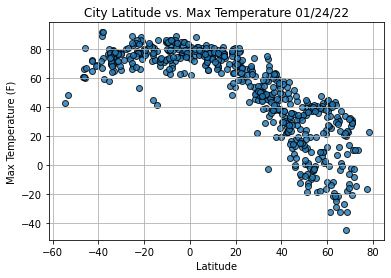

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

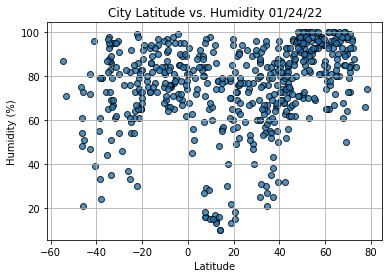

In [41]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

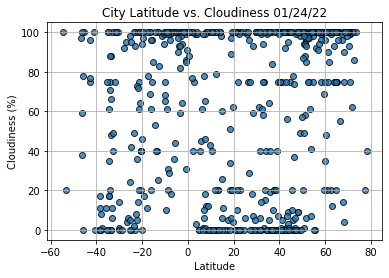

In [42]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()